# 🥶 Peter Sinks

> Demonstrates the following:
>
> - Using TimeSeries service
> - Convert UTC datetime to station local time
> - Plotting with Seaborn
> - Rolling mean for each station
> - Downsample for each station


The Peter Sinks in Northern Utah is one of the coldest places in the contiguous United States ([Utah Climate Center](https://climate.usu.edu/PeterSinks/), [Wikipedia](https://en.wikipedia.org/wiki/Peter_Sinks)). There is a weather station at the top of the rim and another at the bottom. In is not uncommon for temperatures at the bottom station to be 40 or 50 degrees colder than the rim, and the elevation difference between the two stations is only 272 feet. 


In [1]:
from datetime import datetime

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import polars as pl
import seaborn as sns

import synoptic

In [2]:
df = synoptic.TimeSeries(
    start=datetime(2023, 12, 19),
    end=datetime(2023, 12, 27),
    vars="air_temp",
    stid="psink,psrim",
    units="english",
).df()

# Convert date_time to Local Time
df = df.with_columns(pl.col("date_time").dt.convert_time_zone(df["timezone"][0]))

df

🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 2 stations (0.36 seconds).


stid,date_time,variable,sensor_index,is_derived,value,units,id,name,elevation,latitude,longitude,mnet_id,state,timezone,elev_dem,period_of_record_start,period_of_record_end,qc_flagged,is_restricted,is_active
str,"datetime[μs, America/Denver]",str,u32,bool,f64,str,u32,str,f64,f64,f64,u32,str,str,f64,"datetime[μs, UTC]","datetime[μs, UTC]",bool,bool,bool
"""PSINK""",2023-12-18 17:00:00 MST,"""air_temp""",1,false,38.05,"""Fahrenheit""",26896,"""Peter Sinks""",8173.0,41.91302,-111.51416,26,"""UT""","""America/Denver""",8175.9,2010-01-01 00:00:00 UTC,2024-12-12 04:30:00 UTC,false,false,true
"""PSINK""",2023-12-18 17:15:00 MST,"""air_temp""",1,false,37.9,"""Fahrenheit""",26896,"""Peter Sinks""",8173.0,41.91302,-111.51416,26,"""UT""","""America/Denver""",8175.9,2010-01-01 00:00:00 UTC,2024-12-12 04:30:00 UTC,false,false,true
"""PSINK""",2023-12-18 17:30:00 MST,"""air_temp""",1,false,36.51,"""Fahrenheit""",26896,"""Peter Sinks""",8173.0,41.91302,-111.51416,26,"""UT""","""America/Denver""",8175.9,2010-01-01 00:00:00 UTC,2024-12-12 04:30:00 UTC,false,false,true
"""PSINK""",2023-12-18 17:45:00 MST,"""air_temp""",1,false,35.21,"""Fahrenheit""",26896,"""Peter Sinks""",8173.0,41.91302,-111.51416,26,"""UT""","""America/Denver""",8175.9,2010-01-01 00:00:00 UTC,2024-12-12 04:30:00 UTC,false,false,true
"""PSINK""",2023-12-18 18:00:00 MST,"""air_temp""",1,false,34.06,"""Fahrenheit""",26896,"""Peter Sinks""",8173.0,41.91302,-111.51416,26,"""UT""","""America/Denver""",8175.9,2010-01-01 00:00:00 UTC,2024-12-12 04:30:00 UTC,false,false,true
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""PSRIM""",2023-12-26 16:00:00 MST,"""air_temp""",1,false,21.01,"""Fahrenheit""",26897,"""Peter Sinks Rim""",8445.0,41.91909,-111.51022,26,"""UT""","""America/Denver""",8444.9,2010-01-01 00:00:00 UTC,2024-12-12 04:30:00 UTC,false,false,true
"""PSRIM""",2023-12-26 16:15:00 MST,"""air_temp""",1,false,21.68,"""Fahrenheit""",26897,"""Peter Sinks Rim""",8445.0,41.91909,-111.51022,26,"""UT""","""America/Denver""",8444.9,2010-01-01 00:00:00 UTC,2024-12-12 04:30:00 UTC,false,false,true
"""PSRIM""",2023-12-26 16:30:00 MST,"""air_temp""",1,false,21.46,"""Fahrenheit""",26897,"""Peter Sinks Rim""",8445.0,41.91909,-111.51022,26,"""UT""","""America/Denver""",8444.9,2010-01-01 00:00:00 UTC,2024-12-12 04:30:00 UTC,false,false,true


In [9]:
# Elevation Difference
df["elevation"].max() - df["elevation"].min()

272.0

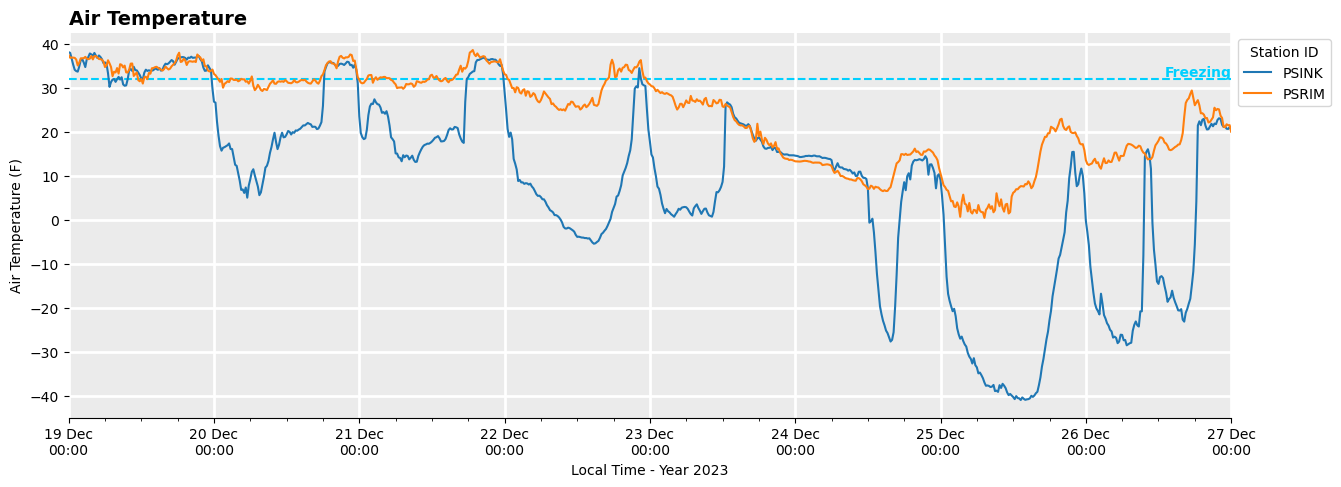

In [3]:
plt.figure(figsize=(15, 5), dpi=100)
ax = plt.gca()

# Freezing Line
ax.axhline(32, ls="--", color="#00d0ff")
ax.text(
    df["date_time"].max(),
    32,
    "Freezing",
    va="bottom",
    ha="right",
    color="#00d0ff",
    fontweight="bold",
)

# Station Temperature
sns.lineplot(
    df,
    ax=ax,
    x="date_time",
    y="value",
    hue="stid",
)

# Cosmetics
ax.set_xlabel("Local Time - Year 2023")
ax.set_ylabel("Air Temperature (F)")
ax.set_title("Air Temperature", loc="left", fontsize=14, fontweight="bold")

ax.set_xlim(df["date_time"].min(), df["date_time"].max())

ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 6)))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %b\n%H:%M"))

ax.grid(color="w", lw=2)
ax.set_facecolor(".92")

ax.legend(title="Station ID", loc=0, bbox_to_anchor=(1, 1))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)


## Rolling Mean

Plotting the 60-min mean temperature gives a more smooth looking graphic. Doing a rolling average will produce a dataframe with the same length as the original data.

> Reference: [polars.DataFrame.rolling](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.rolling.html)

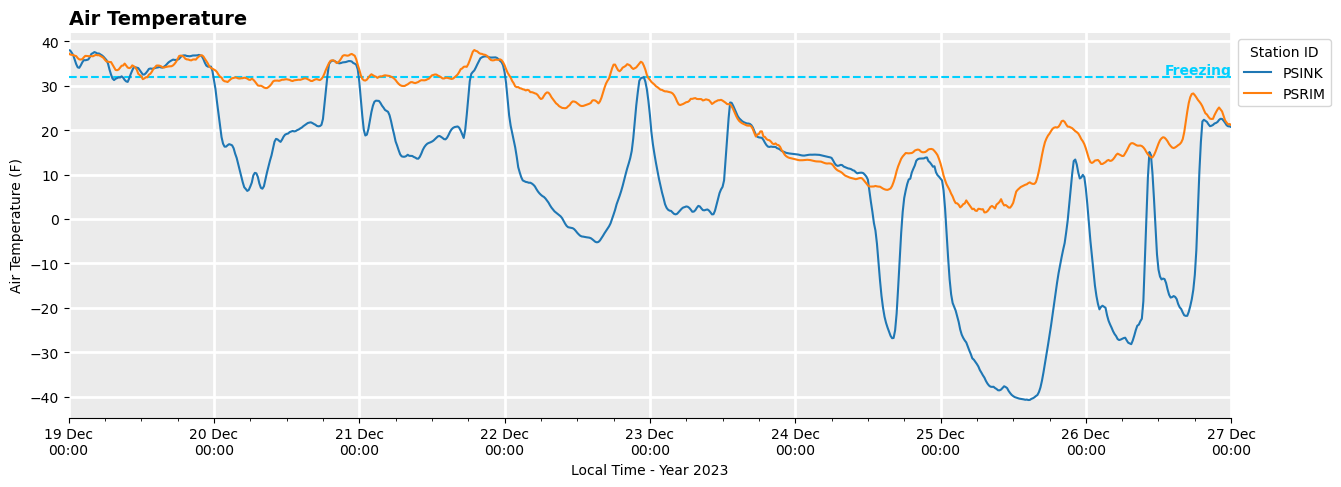

In [4]:
# Rolling mean
df_60m_mean = df.rolling("date_time", period="60m", group_by="stid").agg(
    pl.col("value").mean()
)

plt.figure(figsize=(15, 5), dpi=100)
ax = plt.gca()

# Freezing Line
ax.axhline(32, ls="--", color="#00d0ff")
ax.text(
    df["date_time"].max(),
    32,
    "Freezing",
    va="bottom",
    ha="right",
    color="#00d0ff",
    fontweight="bold",
)

# Station Temperature
sns.lineplot(
    df_60m_mean,
    ax=ax,
    x="date_time",
    y="value",
    hue="stid",
)

# Cosmetics
ax.set_xlabel("Local Time - Year 2023")
ax.set_ylabel("Air Temperature (F)")
ax.set_title("Air Temperature", loc="left", fontsize=14, fontweight="bold")

ax.set_xlim(df["date_time"].min(), df["date_time"].max())

ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 6)))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %b\n%H:%M"))

ax.grid(color="w", lw=2)
ax.set_facecolor(".92")

ax.legend(title="Station ID", loc=0, bbox_to_anchor=(1, 1))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

In [5]:
# Rolling will produce a dataframe of the same length as the original
len(df), len(df_60m_mean)

(1538, 1538)

## Downsampled mean

Using `group_by_dynamic` resamples your data to a coarser, and consistent, time interval. The dataframe will have fewer rows than the original.

> Reference: 
> - [polars.DataFrame.group_by_dynamic](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.group_by_dynamic.html)
> - [Polars Guide: Resampling](https://docs.pola.rs/user-guide/transformations/time-series/resampling/)

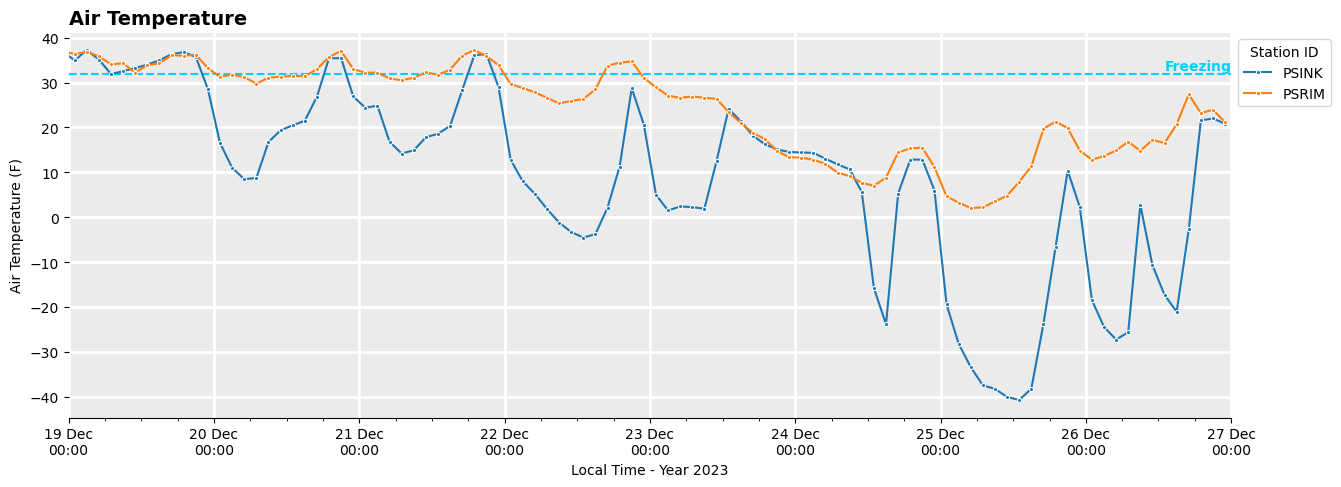

In [6]:
# Group by window
df_2h_group = df.group_by_dynamic("date_time", every="2h", group_by="stid").agg(
    pl.col("value").mean()
)

plt.figure(figsize=(15, 5), dpi=100)
ax = plt.gca()

# Freezing Line
ax.axhline(32, ls="--", color="#00d0ff")
ax.text(
    df["date_time"].max(),
    32,
    "Freezing",
    va="bottom",
    ha="right",
    color="#00d0ff",
    fontweight="bold",
)

# Station Temperature
sns.lineplot(df_2h_group, ax=ax, x="date_time", y="value", hue="stid", marker=".")

# Cosmetics
ax.set_xlabel("Local Time - Year 2023")
ax.set_ylabel("Air Temperature (F)")
ax.set_title("Air Temperature", loc="left", fontsize=14, fontweight="bold")

ax.set_xlim(df["date_time"].min(), df["date_time"].max())

ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 6)))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %b\n%H:%M"))

ax.grid(color="w", lw=2)
ax.set_facecolor(".92")

ax.legend(title="Station ID", loc=0, bbox_to_anchor=(1, 1))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)


In [7]:
# Resampling with group_by_dynamic reduces the dataframe length
len(df), len(df_2h_group)

(1538, 194)